# XOR 연산

In [ ]:
import numpy as np

In [ ]:
X = np.array([
              [0,0],
              [0,1],
              [1,0],
              [1,1]
              ], dtype="float32")
y = np.array([
              [1],
              [0],
              [0],
              [1]
],dtype = 'float32')


w = np.array([
              [1],
              [2]
], dtype = 'float32')

b = np.array([
              [3]
], dtype = 'float32')

In [ ]:
hypothesis = np.dot(X , w) + b
print(hypothesis)

[[3.]
 [5.]
 [4.]
 [6.]]


In [ ]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

In [ ]:
hypothesis = sigmoid(hypothesis)
print(hypothesis)

[[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]]


In [ ]:
hypothesis.shape

(4, 1)

In [ ]:
# X1,X2 구하기 위해서 transform
print("X.T :\n",X.T)
print("="*50)

# 1차원 -> 2차원 배열
# 1줄 4칸
print("X.T[0] :\n",X.T[0].reshape(1,4))
print("="*50)
# 
x1 = X.T[0].reshape(1,-1)
print("X.T[0] :\n",X.T[0].reshape(1,-1))
print("="*50)


w1_gred = 1/4 * np.dot(x1,(hypothesis - y))
print("w1_gred :\n",w1_gred)
print("="*50)

# x1의 기울기
# sum : 어짜피 값 한개가 나와서 배열뺴고 값만 보기위해 사용 
# 1줄 4칸 * 4줄 1칸을 곱해서 1줄 1칸 : 값 한개가 나옴  
w1_gred = np.sum(1/4 * np.dot(x1,(hypothesis - y)))
print("X.T[0] :\n",w1_gred)
print("="*50)


# x2
x2 = X.T[1]
print("X.T[1] :\n",x2)
print("="*50)

# w2 기울기
w2_gred = np.sum(1/4 * np.dot(x2,(hypothesis - y)))
print("we_gred : \n",w2_gred)
print("="*50)

# b_gred
b_gred = 1/4 * np.sum(hypothesis - y)
print("b_gred :\n",b_gred)

X.T :
 [[0. 0. 1. 1.]
 [0. 1. 0. 1.]]
X.T[0] :
 [[0. 0. 1. 1.]]
X.T[0] :
 [[0. 0. 1. 1.]]
w1_gred :
 [[0.2448853]]
X.T[0] :
 0.2448853
X.T[1] :
 [0. 1. 0. 1.]
we_gred : 
 0.24770865
b_gred :
 0.48135560750961304


In [ ]:
learning_rate = 0.1

for j in range(2):
  print("step : ",j)

  # 예측
  hypothesis = sigmoid(np.dot(X,w)  + b)
  print("hypothesis = ",hypothesis)

  # 오차
  cost = -1/4 * np.sum(y * np.log(hypothesis) + (1 - y)* np.log(1- hypothesis))
  print("cost = ", cost)

  # 차원변경
  X_col_2d = X.T[j].reshape(1, -1)
  print("x{} = {}".format(j+1, X_col_2d))

  # 기울기 수정값
  w_gred = 1/4 * np.sum(np.dot ( X_col_2d , (hypothesis - y)))
  print("w{}_gred = {}".format(j+1, w_gred))
  
  # 편향 수정값
  b_gred = 1/4 * np.sum(hypothesis - y)
  print("b_gred = ", b_gred)

  # 기울기 수정
  w[j] = w[j] - learning_rate * w_gred
  print("w{} = {}".format(j+1, w[j]))

  # 편향 수정
  b = b - learning_rate * b_gred
  print("b = ", b)
  print("="*100)

step :  0
hypothesis =  [[0.95257413]
 [0.9933072 ]
 [0.98201376]
 [0.9975274 ]]
cost =  2.2689826488494873
x1 = [[0. 0. 1. 1.]]
w1_gred = 0.24488529562950134
b_gred =  0.48135560750961304
w1 = [0.9755115]
b =  [[2.9518645]]
step :  1
hypothesis =  [[0.9503516 ]
 [0.99297947]
 [0.9806851 ]
 [0.9973416 ]]
cost =  2.239845037460327
x2 = [[0. 1. 0. 1.]]
w2_gred = 0.24758026003837585
b_gred =  0.4803394675254822
w2 = [1.975242]
b =  [[2.9038305]]


In [ ]:
learning_rate = 0.1

# 1000번 실행
for i in range(1000):
  print("*" * 100)
  print(" i = ", i)
  print("*" * 100)
# ragne(2) -> x1,x2 2개 
  for j in range(2):
    print("step : ",j)

    # 예측
    hypothesis = sigmoid(np.dot(X,w)  + b)
    print("hypothesis = ",hypothesis)

    # 오차
    cost = -1/4 * np.sum(y * np.log(hypothesis) + (1 - y)* np.log(1- hypothesis))
    print("cost = ", cost)

    # 차원변경
    X_col_2d = X.T[j].reshape(1, -1)
    print("x{} = {}".format(j+1, X_col_2d))

    # 기울기 수정값
    w_gred = 1/4 * np.sum(np.dot ( X_col_2d , (hypothesis - y)))
    print("w{}_gred = {}".format(j+1, w_gred))
    
    # 편향 수정값
    b_gred = 1/4 * np.sum(hypothesis - y)
    print("b_gred = ", b_gred)

    # 기울기 수정
    w[j] = w[j] - learning_rate * w_gred
    print("w{} = {}".format(j+1, w[j]))

    # 편향 수정
    b = b - learning_rate * b_gred
    print("b = ", b)
    print("="*100)

In [ ]:
predict = sigmoid(np.dot(X,w) + b)
print("predict : \n", predict)
print("=" * 100)

predict01 = np.where(predict > 0.5 , 1, 0)
print("0.5보다 크면 1, 아니면 0 : \n",predict01)

predict02  = (predict01 == y)
print("일치하면 True, 아니면 False : \n",predict02)

accuracy = np.sum(predict02)/4
print("정확도:", accuracy)

predict : 
 [[0.49872515]
 [0.5001517 ]
 [0.49959758]
 [0.5010241 ]]
0.5보다 크면 1, 아니면 0 : 
 [[0]
 [1]
 [0]
 [1]]
일치하면 True, 아니면 False : 
 [[False]
 [False]
 [ True]
 [ True]]
정확도: 0.5


# XOR 연산 wtih Tensorflow 1.x (1)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# X
X = np.array([
              [0, 0],
              [0, 1],
              [1, 0],
              [1, 1]
], dtype = 'float32')

# y
y = np.array([
              [0],
              [1],
              [1],
              [0]
],dtype = 'float32')

# w0
w0 = tf.Variable([
                  [1],
                  [3]
] , dtype="float32")

# w1
w1 = tf.Variable([
                  [5]
], dtype="float32")

# b0
b0 = tf.Variable([
                  [0]
], dtype = 'float32')

# b1
b1 = tf.Variable([
                  [0]
], dtype="float32")

In [ ]:
hypothesis0 = tf.matmul(X , w0) + b0
print("hypothesis0 :\n",hypothesis0)

hypothesis0 = tf.sigmoid(hypothesis0)
print("hypothesis0 :\n",hypothesis0)

hypothesis1 = tf.sigmoid( tf.matmul(hypothesis0, w1) + b1 )
print("hypothesis1 :\n",hypothesis1)

hypothesis0 :
 tf.Tensor(
[[0.]
 [3.]
 [1.]
 [4.]], shape=(4, 1), dtype=float32)
hypothesis0 :
 tf.Tensor(
[[0.5       ]
 [0.95257413]
 [0.7310586 ]
 [0.98201376]], shape=(4, 1), dtype=float32)
hypothesis1 :
 tf.Tensor(
[[0.9241418 ]
 [0.99153125]
 [0.9747977 ]
 [0.9926819 ]], shape=(4, 1), dtype=float32)


In [ ]:
with tf.GradientTape() as tape:
    print("=" * 100)
    print("w0 = ", w0)
    print("b0 = ", b0)
    hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
    print("hypothesis0 = ", hypothesis0)
    print("=" * 100)

    print("w1 = ",w1)
    print("b1 = ",b1)
    hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b0)
    print("hypothesis1 = ",hypothesis1)
    print("=" * 100)

    cost = -tf.reduce_mean(y * tf.log(hypothesis1) +(1 - y) * tf.log(1 - hypothesis1))
    print("cost = ", cost)
    print("=" * 100)
    grads = tape.gradient(cost, [w0, w1, b0, b1])
    print("grads = ",grads)
    print("=" * 100)

w0 =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [3.]], dtype=float32)>
b0 =  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>
hypothesis0 =  tf.Tensor(
[[0.5       ]
 [0.95257413]
 [0.7310586 ]
 [0.98201376]], shape=(4, 1), dtype=float32)
w1 =  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[5.]], dtype=float32)>
b1 =  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>
hypothesis1 =  tf.Tensor(
[[0.9241418 ]
 [0.99153125]
 [0.9747977 ]
 [0.9926819 ]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(1.882582, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=301, shape=(2, 1), dtype=float32, numpy=
array([[0.01572301],
       [0.02143861]], dtype=float32)>, <tf.Tensor: id=291, shape=(1, 1), dtype=float32, numpy=array([[0.3526017]], dtype=float32)>, <tf.Tensor: id=302, shape=(1, 1), dtype=float32, numpy=array([[0.77482724]], dtype=float32)>, None]


In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)
for step in range(5000):
  print("step : ",step)
  with tf.GradientTape() as tape:
    print("=" * 100)
    print("w0 = ", w0)
    print("b0 = ", b0)
    hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)
    print("hypothesis0 = ", hypothesis0)
    print("=" * 100)

    print("w1 = ",w1)
    print("b1 = ",b1)
    hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b0)
    print("hypothesis1 = ",hypothesis1)
    print("=" * 100)

    cost = -tf.reduce_mean(y * tf.log(hypothesis1) +(1 - y) * tf.log(1 - hypothesis1))
    print("cost = ", cost)
    print("=" * 100)
    grads = tape.gradient(cost, [w0, w1, b0, b1])
    print("grads = ",grads)
    print("=" * 100)

    optimizer.apply_gradients(grads_and_vars = zip(grads,[w0, w1, b0, b1]))
    print("*" * 100)
    print("*" * 100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
w1 =  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.583636]], dtype=float32)>
b1 =  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>
hypothesis1 =  tf.Tensor(
[[0.3937332 ]
 [0.9103713 ]
 [0.2248737 ]
 [0.22604847]], shape=(4, 1), dtype=float32)
cost =  tf.Tensor(0.58570004, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=434073, shape=(2, 1), dtype=float32, numpy=
array([[ 0.00037734],
       [-0.00024123]], dtype=float32)>, <tf.Tensor: id=434063, shape=(1, 1), dtype=float32, numpy=array([[7.9221845e-06]], dtype=float32)>, <tf.Tensor: id=434074, shape=(1, 1), dtype=float32, numpy=array([[-1.9446015e-06]], dtype=float32)>, None]
****************************************************************************************************
****************************************************************************************************
step :  4822
w0 =  <tf.Variable 'Variable:0' shape=(2, 1) 

# XOR 연산 with Tensorflow 1.x (2)

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# X
X = np.array([
              [0, 0],
              [0, 1],
              [1, 0],
              [1, 1]
], dtype = 'float32')

# y
y = np.array([
              [0],
              [1],
              [1],
              [0]
],dtype = 'float32')

# w0
w0 = tf.Variable([
                  [1, 2],
                  [3, 4]
] , dtype="float32")

# w1
w1 = tf.Variable([
                  [5],
                  [6]
], dtype="float32")

# b0
b0 = tf.Variable([
                  [0, 0]
], dtype = 'float32')

# b1
b1 = tf.Variable([
                  [0, 0]
], dtype="float32")

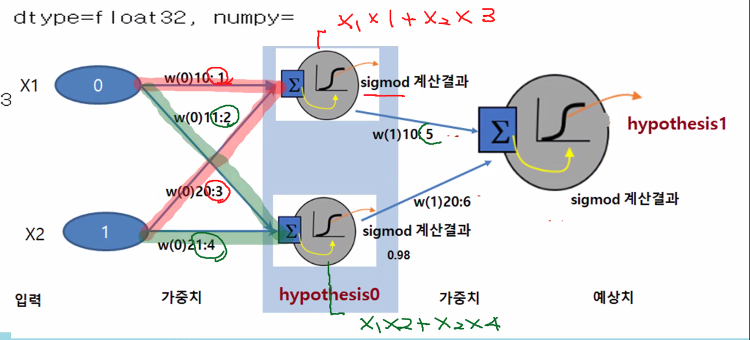

In [ ]:
# 선형 회귀 2번, 값 두개, -> 첫번째 예측 값
# 첫번쨰 예측값 다시 선형 회귀 - >두번쨰 예측값
# 첫번쨰
hypothesis0 = tf.matmul(X , w0) + b0
print("hypothesis0 :\n",hypothesis0)
print("="* 50)

hypothesis0 = tf.sigmoid(hypothesis0)
print("hypothesis0_sigmoid :\n",hypothesis0)
print("="* 50)

# 두번쨰
hypothesis1 = tf.matmul(hypothesis0, w1) + b1
print("hypothesis1 : \n",hypothesis1)
print("="* 50)

hypothesis1 = tf.sigmoid(hypothesis1)
print("hypothesis1_sigmoid :\n",hypothesis1)
print("="* 50)


hypothesis0 :
 tf.Tensor(
[[0. 0.]
 [3. 4.]
 [1. 2.]
 [4. 6.]], shape=(4, 2), dtype=float32)
hypothesis0_sigmoid :
 tf.Tensor(
[[0.5        0.5       ]
 [0.95257413 0.98201376]
 [0.7310586  0.8807971 ]
 [0.98201376 0.99752736]], shape=(4, 2), dtype=float32)
hypothesis1 : 
 tf.Tensor(
[[ 5.5       5.5     ]
 [10.654953 10.654953]
 [ 8.940076  8.940076]
 [10.895233 10.895233]], shape=(4, 2), dtype=float32)
hypothesis1_sigmoid :
 tf.Tensor(
[[0.99592984 0.99592984]
 [0.9999764  0.9999764 ]
 [0.999869   0.999869  ]
 [0.9999815  0.9999815 ]], shape=(4, 2), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.1)

In [ ]:
for step in range(5000):
  print("step = ",step)
  with tf.GradientTape() as tape:
    print("w0 = ",w0)
    print("b0 = ",b0)

    hypothesis0 = tf.sigmoid(tf.matmul(X,w0) + b0)
    print("hypothesis = ", hypothesis0)
    print("=" * 100)

    hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)
    print("hypothesis1 = ",hypothesis1)
    print("="*100)
    cost = -tf.reduce_mean( y * tf.log(hypothesis1)+ (1-y)*tf.log(1-hypothesis1))
    print("cost = ", cost)

    grads = tape.gradient(cost, [w0, w1, b0, b1])
    print("grads = ", grads)
    optimizer.apply_gradients(grads_and_vars =zip(grads,[w0, w1, b0, b1]))
    print("="*100)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
cost =  tf.Tensor(0.00024378559, shape=(), dtype=float32)
grads =  [<tf.Tensor: id=465198, shape=(2, 2), dtype=float32, numpy=
array([[ 6.0722427e-06,  8.1269718e-07],
       [-6.3568737e-06, -2.0939415e-06]], dtype=float32)>, <tf.Tensor: id=465188, shape=(2, 1), dtype=float32, numpy=
array([[ 4.6841422e-05],
       [-5.1034996e-05]], dtype=float32)>, <tf.Tensor: id=465197, shape=(1, 2), dtype=float32, numpy=array([[-6.0305870e-06, -1.4247748e-06]], dtype=float32)>, <tf.Tensor: id=465186, shape=(1, 2), dtype=float32, numpy=array([[-2.1886082e-05, -2.1886082e-05]], dtype=float32)>]
step =  4792
w0 =  <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.064963, -12.630214],
       [  9.625867,  12.920089]], dtype=float32)>
b0 =  <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.2554994, -7.2072883]], dtype=float32)>
hypothesis =  tf.Tensor(
[[9.8601246e-01 7.4058771e-04]
 [9.9999905e-01 9.9670744e-01]
 [8.086293

In [ ]:
# 수정된 weight, bias

# weight
print("w0 : \n",w0)
print("w1 : \n",w1)

# bias
print("b0 : \n",b0)
print("b1 : \n",b1)

w0 : 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.12464 , -12.648864],
       [  9.688228,  12.943742]], dtype=float32)>
w1 : 
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-17.039623],
       [ 17.55054 ]], dtype=float32)>
b0 : 
 <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.2849054, -7.1995764]], dtype=float32)>
b1 : 
 <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[8.180058, 8.180058]], dtype=float32)>


# 실습

## 심층신경망을 이용한 XOR (텐서플로 1.x)
- 206 ~ 216

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# X
X = np.array([
              [0, 0],
              [0, 1],
              [1, 0],
              [1, 1]
], dtype = 'float32')

# y
y = np.array([
              [0],
              [1],
              [1],
              [0]
],dtype = 'float32')

# w0
w0 = tf.Variable([
                  [1, 2],
                  [3, 4]
] , dtype="float32")

# w1
w1 = tf.Variable([
                  [5],
                  [6]
], dtype="float32")

# b0
b0 = tf.Variable([
                  [0, 0]
], dtype = 'float32')

# b1
b1 = tf.Variable([
                  [0]
], dtype="float32")

In [ ]:
# 첫번쨰
hypothesis0 = tf.sigmoid(tf.matmul(X , w0) + b0)
print("hypothesis0_sigmoid :\n",hypothesis0)
print("="* 50)

# 두번쨰
hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)
print("hypothesis1_sigmoid :\n",hypothesis1)
print("="* 50)


hypothesis0_sigmoid :
 tf.Tensor(
[[0.5        0.5       ]
 [0.95257413 0.98201376]
 [0.7310586  0.8807971 ]
 [0.98201376 0.99752736]], shape=(4, 2), dtype=float32)
hypothesis1_sigmoid :
 tf.Tensor(
[[0.9959299]
 [0.9999764]
 [0.999869 ]
 [0.9999814]], shape=(4, 1), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.1)
for step in range(5000):
  with tf.GradientTape() as tape:
    hypothesis0 = tf.sigmoid(tf.matmul(X, w0) +b0)

    hypothesis1 = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)

    cost = -tf.reduce_mean(y * tf.log(hypothesis1) + (1-y) * tf.log(1- hypothesis1))

    grads = tape.gradient(cost, [w0, w1, b0, b1])

    optimizer.apply_gradients(grads_and_vars = zip(grads,[w0, w1, b0, b1]))
    if step % 100 == 0:
      print("cost :{}, w0:{}, w1 : {}".format(cost, w0, w1))

In [ ]:
# 가중치, 편향 출력
print("w0 : \n",w0)
print("w1 : \n",w1)

print("b0 : \n",b0)
print("b10 : \n",b1)

w0 : 
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ -9.12464 , -12.648861],
       [  9.688222,  12.943744]], dtype=float32)>
w1 : 
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-17.039652],
       [ 17.550508]], dtype=float32)>
b0 : 
 <tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[ 4.284906 , -7.1995845]], dtype=float32)>
b10 : 
 <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[8.180049]], dtype=float32)>


In [ ]:
# 예측
# 첫번쨰 선형회귀
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) + b0)

# 2번쨰 선형회귀값을 예측값으로
predict = tf.sigmoid(tf.matmul(hypothesis0, w1) +b1)

print("predict = \n",predict)
print("="*  100)

predict01 = tf.cast(predict>0.5, dtype = tf.float32)
print("0.5이상이면 1, 아니면 0 으로 변환 : \n", predict01)
print("="*  100)

# 정답이랑 비교
ac01 = tf.equal(predict01, y)
print("정답이면 True, 아니면 False :\n", ac01)
print("="*  100)

# True,False  ->1,0
ac02 = tf.cast(ac01, dtype = tf.float32)
print("True, False -> 1,0으로 변환 :\n",ac02)
print("="*  100)

# 정확도 구하기 
ac03 = tf.reduce_mean(ac02)
print("정확도:",ac03.numpy())
print("="*  100)

# 위에 과정을 한줄로
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y), dtype = tf.float32))
print("정확도 :",accuracy.numpy())

predict = 
 tf.Tensor(
[[1.8133664e-04]
 [9.9982232e-01]
 [9.9967980e-01]
 [1.6499007e-04]], shape=(4, 1), dtype=float32)
0.5이상이면 1, 아니면 0 으로 변환 : 
 tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)
정답이면 True, 아니면 False :
 tf.Tensor(
[[ True]
 [ True]
 [ True]
 [ True]], shape=(4, 1), dtype=bool)
True, False -> 1,0으로 변환 :
 tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]], shape=(4, 1), dtype=float32)
정확도: 1.0
정확도 : 1.0


In [ ]:
# 0, 1 XOR 연산
arr = np.array([
                [0,1]
], dtype = "float32")

hypothesis0 =tf.sigmoid(tf.matmul(arr, w0) + b0)

predict = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)

print(predict.numpy())

predict = tf.cast(predict > 0.5,1, 0)
print(predict.numpy())

[[0.9998223]]
[[1.]]


In [ ]:
# 1, 1 XOR 연산
arr = np.array([
                [1,1]
], dtype = "float32")

hypothesis0 =tf.sigmoid(tf.matmul(arr, w0) + b0)

predict = tf.sigmoid(tf.matmul(hypothesis0, w1) + b1)

print(predict.numpy())

predict = tf.cast(predict > 0.5,1, 0)
print(predict.numpy())

[[0.00016499]]
[[0.]]


## 심층신경망을 이용한 XOR (텐서플로 2.x)

- 217 ~ 227

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# X
X = np.array([
              [0, 0],
              [0, 1],
              [1, 0],
              [1, 1]
], dtype = 'float32')

# y
y = np.array(
              [0, 1, 1, 0]
,dtype = 'float32')

In [ ]:
model =  Sequential()

# 출력 데이터는 hypothesis0이고 칸의 수는 2
# input_dim =2 , 입력데이터는 X이고 칸의 수는 2
model.add(Dense(2, input_dim = 2, activation = "sigmoid"))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

# binary_crossentropy =
# -1/4 * (y * np.log(hypothesis) + (1-y) * np.log(1-hypothesis))
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics=['acc'])

model.fit(X, y, epochs = 500)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 373ms/step - loss: 0.7197 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.7168 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7141 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7115 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.7091 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 3ms/st

In [ ]:
# 예측
pred = model.predict(X)
print("pred : \n", pred)
print("="*100)

predict01 = np.where(pred > 0.5, 1, 0)
print("0.5보다 크면 1, 아니면 0 :\n",predict01)
print("="*100)

predict02 = predict01.flatten()
print("1차원 배열로 변환 : ",predict02)
print("="*100)

predict03 = (predict02 == y)
print("맞으면 True, 틀리면 False :", predict03)

# 정확도 계산
acc =np.sum(predict03)/len(predict03)
print("정확도 :",acc)

pred : 
 [[0.0820266 ]
 [0.8528396 ]
 [0.85800016]
 [0.17367616]]
0.5보다 크면 1, 아니면 0 :
 [[0]
 [1]
 [1]
 [0]]
1차원 배열로 변환 :  [0 1 1 0]
맞으면 True, 틀리면 False : [ True  True  True  True]
정확도 : 1.0


In [ ]:
# 0,1 xor 연산
arr =np.array( [ [0, 1]], dtype ="float32")

pred = model.predict(arr)

print(pred)

pred1 = np.where(pred >0.5,1,0)
print("0 XOR 1 = ",pred1)

[[0.8528396]]
0 XOR 1 =  [[1]]


In [ ]:
# 0,1 xor 연산
arr =np.array( [ [1, 1]], dtype ="float32")

pred = model.predict(arr)

print(pred)

pred1 = np.where(pred >0.5,1,0)
print("1 XOR 1 = ",pred1)

[[0.17367616]]
1 XOR 1 =  [[0]]
